In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
def prepare_data(name: str):
    file = pd.read_csv(name, header=None).T
    file.columns = [name]
    file = file.iloc[:len(file)-1] # drop last row
    file = file.astype(np.float16)
    return file

def hist(df: pd.Series):
    df.hist(figsize=(10,7), bins=25, legend=True)

In [3]:
f1 = prepare_data('random_1.txt')
f2 = prepare_data('random_2.txt')
f3 = prepare_data('random_3.txt')

In [4]:
f1.tail(2)

,random_1.txt
998,-3.666016
999,-0.596680


In [5]:
f2.tail(2)

,random_2.txt
998,4.863281
999,4.160156


In [6]:
f3.tail(2)

,random_3.txt
998,7.707031
999,3.539062


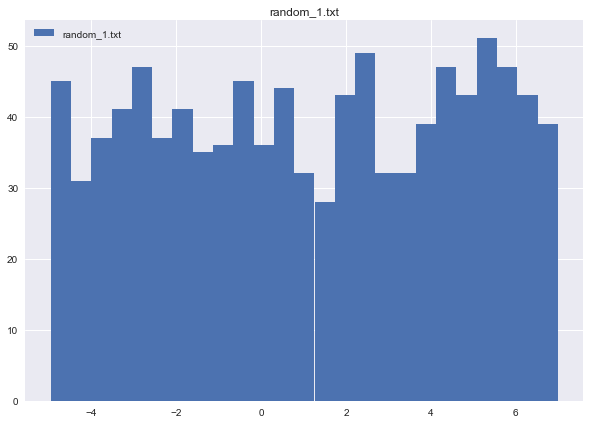

In [7]:
hist(f1)

##### File 2 - Normal Distrubtion

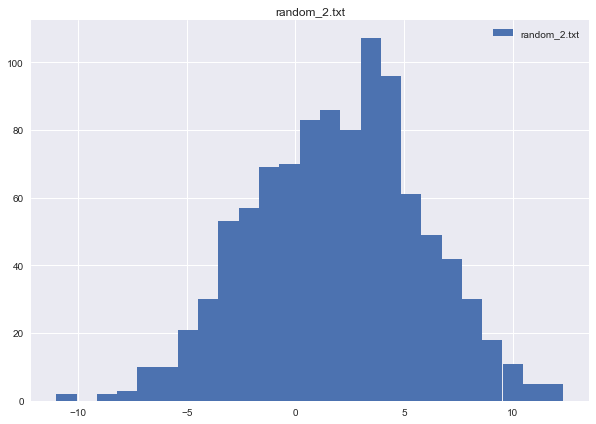

In [8]:
hist(f2)

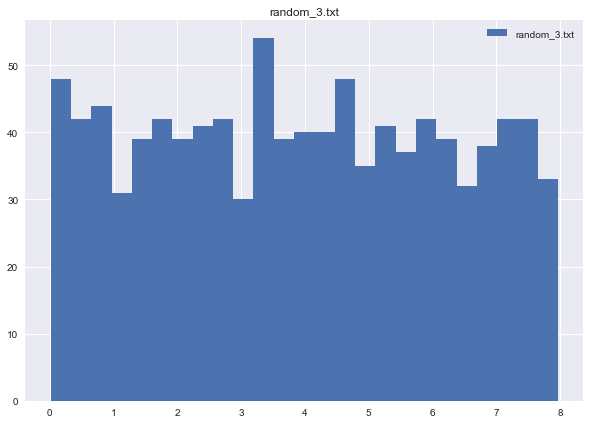

In [9]:
hist(f3)

Чисто визуально и файл 1, и файл 3 можно отнести к равномерному распределению. Какого-то смещения визуально не видно.

Нашел либу, которая фитит распределение под какие-то уже сгенерированные и выдает score. Получилось, что все распределения - Beta)))

In [10]:
from distfit import distfit

def fit_dist(df):
    dist = distfit()
    dist.fit_transform(df)
    results = dist.summary
    results.score = results.score.astype(np.float16)
    
    return results.sort_values(by='score', ascending=True)

In [11]:
fit_dist(f1.values)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.069987] [loc=1.140 scale=3.499]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.111313] [loc=-4.957 scale=6.097]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.300409] [loc=-6.645 scale=1.688]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0598997] [loc=1.287 scale=3.410]
[distfit] >[t         ] [0.08 sec] [RSS: 0.0699923] [loc=1.140 scale=3.499]
[distfit] >[genextreme] [0.04 sec] [RSS: 0.0625056] [loc=0.298 scale=3.799]
[distfit] >[gamma     ] [0.08 sec] [RSS: 0.0700177] [loc=-185.933 scale=0.066]
[distfit] >[lognorm   ] [0.16 sec] [RSS: 0.0704991] [loc=-107.765 scale=108.832]
[distfit] >[beta      ] [0.10 sec] [RSS: 0.0170231] [loc=-4.958 scale=11.950]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.017509] [loc=-4.957 scale=11.949]
[distfit] >[loggamma  ] [0.06 sec] [RSS: 0.0699063] [loc=-136.481 scale=31.378]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.017029,NaN,-4.958105,11.950292,"(0.9961004648423499, 0.9604359045139994)"
1,uniform,0.017502,NaN,-4.957031,11.949219,()
2,dweibull,0.059906,NaN,1.287393,3.409665,"(1.7540058853549454,)"
3,genextreme,0.062500,NaN,0.297934,3.798816,"(0.5085359061758384,)"
4,loggamma,0.069885,NaN,-136.481278,31.378336,"(80.80790888208165,)"
5,norm,0.070007,NaN,1.140169,3.499172,()
6,t,0.070007,NaN,1.13983,3.499078,"(8418194.67662739,)"
7,gamma,0.070007,NaN,-185.932514,0.065533,"(2854.597610207291,)"
8,lognorm,0.070496,NaN,-107.764572,108.831599,"(0.03212939017179657,)"
9,expon,0.111328,NaN,-4.957031,6.097201,()


In [12]:
fit_dist(f2.values)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00698917] [loc=1.931 scale=3.856]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.113232] [loc=-11.016 scale=12.947]
[distfit] >[pareto    ] [0.10 sec] [RSS: 0.10428] [loc=-2008.524 scale=1997.505]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.00748507] [loc=1.912 scale=3.402]
[distfit] >[t         ] [0.08 sec] [RSS: 0.00698933] [loc=1.931 scale=3.856]
[distfit] >[genextreme] [0.18 sec] [RSS: 0.0067544] [loc=0.591 scale=3.903]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.00717972] [loc=-119.018 scale=0.123]
[distfit] >[lognorm   ] [0.15 sec] [RSS: 0.00709446] [loc=-355.162 scale=357.081]
[distfit] >[beta      ] [0.04 sec] [RSS: 0.00652854] [loc=-18.792 scale=37.203]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0683391] [loc=-11.016 scale=23.352]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.00681218] [loc=-186.035 scale=40.124]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.006527,NaN,-18.791903,37.203102,"(12.236580275038126, 9.730543179321256)"
1,genextreme,0.006756,NaN,0.590587,3.902726,"(0.2958773606550311,)"
2,loggamma,0.006813,NaN,-186.035367,40.124355,"(108.76718867960025,)"
3,norm,0.006989,NaN,1.931417,3.855813,()
4,t,0.006989,NaN,1.931332,3.85579,"(4500744.497009927,)"
5,lognorm,0.007095,NaN,-355.162129,357.081367,"(0.01077283212938417,)"
6,gamma,0.007179,NaN,-119.017648,0.123455,"(979.6497553799427,)"
7,dweibull,0.007484,NaN,1.912177,3.401551,"(1.3468586774469316,)"
8,uniform,0.068359,NaN,-11.015625,23.351562,()
9,pareto,0.104309,NaN,-2008.524168,1997.505041,"(134.21367969879373,)"


In [13]:
fit_dist(f3.values)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.132973] [loc=3.922 scale=2.289]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.221462] [loc=0.014 scale=3.908]
[distfit] >[pareto    ] [0.04 sec] [RSS: 0.43658] [loc=-1.861 scale=1.874]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.141628] [loc=3.943 scale=2.184]
[distfit] >[t         ] [0.08 sec] [RSS: 0.132988] [loc=3.922 scale=2.289]
[distfit] >[genextreme] [0.05 sec] [RSS: 0.125252] [loc=3.266 scale=2.384]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.132976] [loc=-260.686 scale=0.020]
[distfit] >[lognorm   ] [0.16 sec] [RSS: 0.132778] [loc=-75.206 scale=79.093]
[distfit] >[beta      ] [0.13 sec] [RSS: 0.0356253] [loc=0.014 scale=7.959]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0363817] [loc=0.014 scale=7.951]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 0.132497] [loc=-449.456 scale=67.137]
[distfit] >Compute confidence interval [parametric]


,distr,score,LLE,loc,scale,arg
0,beta,0.035614,NaN,0.013832,7.959315,"(0.9703137780842364, 1.0254819605194547)"
1,uniform,0.036377,NaN,0.013832,7.951012,()
2,genextreme,0.125244,NaN,3.265769,2.384138,"(0.417421100408252,)"
3,loggamma,0.132446,NaN,-449.45614,67.136538,"(857.1435501111387,)"
4,lognorm,0.132812,NaN,-75.205666,79.093439,"(0.02895080979676376,)"
5,norm,0.132935,NaN,3.922214,2.289309,()
6,gamma,0.132935,NaN,-260.685527,0.0198,"(13363.950596813884,)"
7,t,0.132935,NaN,3.922205,2.289205,"(9545989.634559348,)"
8,dweibull,0.141602,NaN,3.943481,2.183719,"(1.6157884931737605,)"
9,expon,0.221436,NaN,0.013832,3.908382,()
